## Question 1

In [1]:
using PyPlot

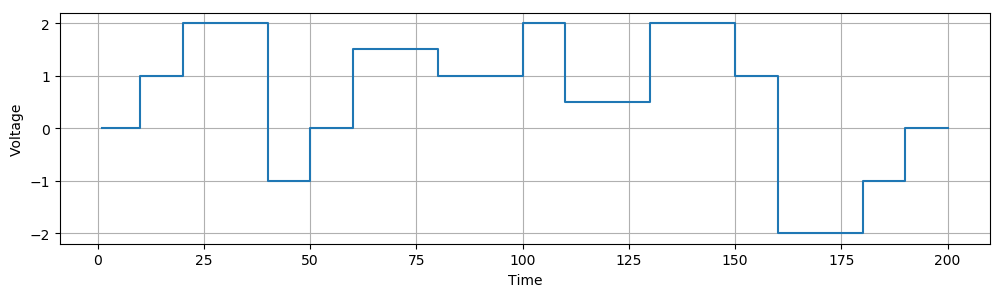

In [19]:
in_voltage = readcsv("voltages.csv")
figure(figsize=(12,3))
step(1:200,raw)
xlabel("Time"); ylabel("Voltage"); grid();

In [91]:
using JuMP, Mosek

T=200
m = Model(solver=MosekSolver(LOG=0))
@variable(m, out_voltage[1:T]) # variable to hold the new voltages

# expression to describe the regularization function
@expression(m, reg_function, sum((out_voltage[i] - out_voltage[i-1])^2 for i in 2:length(out_voltage)))


:Optimal

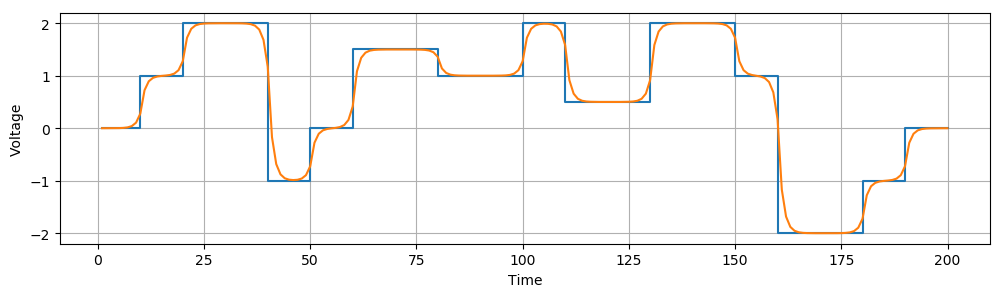

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa8314a3990>

In [104]:
lambda = 1
@objective(m, Min, sum((out_voltage - in_voltage).^2) + lambda*reg_function) 
solve(m)
figure(figsize=(12,3))
step(1:200,raw)
xlabel("Time"); ylabel("Voltage"); grid();
plot(1:200, getvalue(out_voltage))




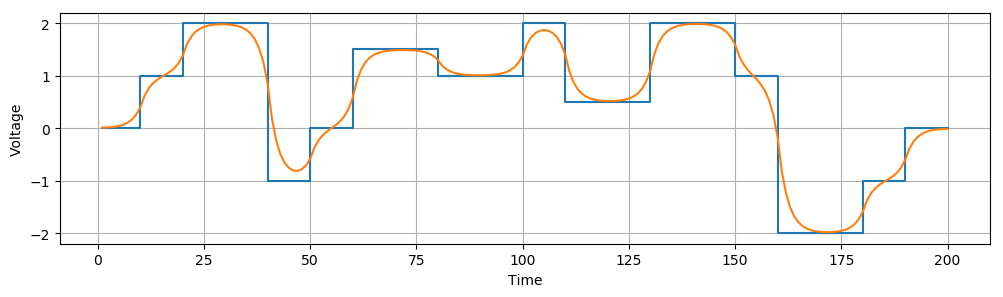

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa831a59bd0>

In [93]:
# lambda
lambda = 5
# objective function
@objective(m, Min, sum((out_voltage - in_voltage).^2) + lambda*reg_function) 
solve(m)
figure(figsize=(12,3))
step(1:200,raw)
xlabel("Time"); ylabel("Voltage"); grid();
plot(1:200, getvalue(out_voltage))

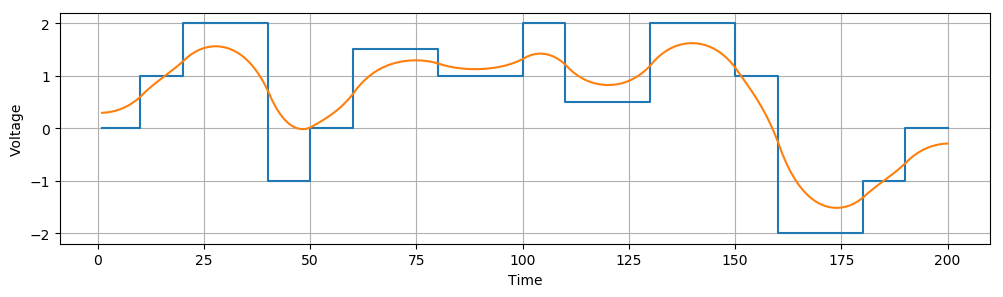

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa8318f4810>

In [96]:
# lambda
lambda = 50
# objective function
@objective(m, Min, sum((out_voltage - in_voltage).^2) + lambda*reg_function) 
solve(m)
figure(figsize=(12,3))
step(1:200,raw)
xlabel("Time"); ylabel("Voltage"); grid();
plot(1:200, getvalue(out_voltage))

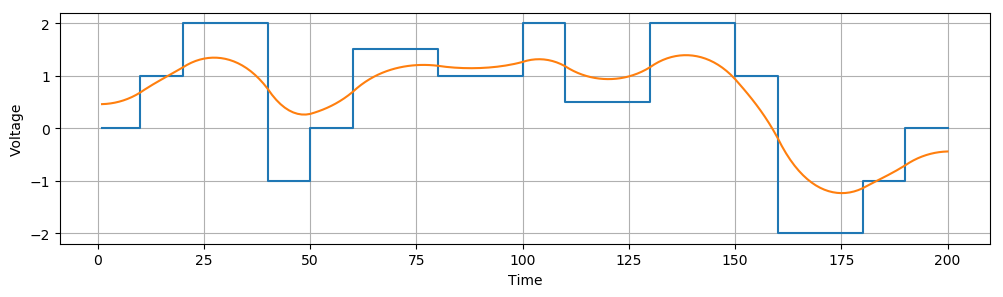

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa831801190>

In [97]:
# lambda
lambda = 100
# objective function
@objective(m, Min, sum((out_voltage - in_voltage).^2) + lambda*reg_function) 
solve(m)
figure(figsize=(12,3))
step(1:200,raw)
xlabel("Time"); ylabel("Voltage"); grid();
plot(1:200, getvalue(out_voltage))